In [62]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# 'observation.db' holds both Postgres and MySQL observations.
conn = sqlite3.connect('results/observation.db')

# These contain the start + end times for both MySQL and Postgres.
log_columns = ['id', 'start_time', 'end_time', 'time_delta', 'workload', 'concurrency', 'mpl', 'iso']
mysql_log = pd.read_csv('results/mysql-log.csv', names=log_columns)
postgres_log = pd.read_csv('results/postgres-log.csv', names=log_columns)

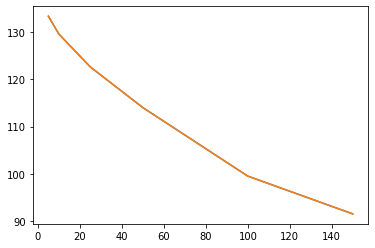

In [72]:
# Response time of INSERT-only workload for Postgres and MySQL as a function of MPL.

mpls = mysql_log.query('workload == "i" and concurrency == "low"')['mpl']
mysql_response_time = mysql_log.query('workload == "i" and concurrency == "low"')['time_delta']
postgres_response_time = postgres_log.query('workload == "i" and concurrency == "low"')['time_delta']

plt.plot(mpls, mysql_response_time)
plt.plot(mpls, postgres_response_time)

In [21]:
# Response time of QUERY-only workload for Postgres and MySQL as a function of MPL.



In [22]:
# Response time of complete workload for Postgres and MySQL as a function of MPL.



In [ ]:
# Response time of complete workload for Postgres and MySQL w/ different isolation levels.

